## import Libraries 

In [118]:
# import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
#ignore warnings
warnings.filterwarnings("ignore")

## Read the data

In [4]:
df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')
df.head(5)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


## Data Cleaning

In [6]:
df.shape

(200000, 24)

In [7]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [8]:
df.Customer_Name.value_counts()

Customer_Name
Aahana Kala        8
Krishna Sani       7
Madhav Kala        7
Jonathan Dara      7
Mitali Lad         7
                  ..
Chaitaly Parekh    1
Omkaar Gandhi      1
Oviya Chokshi      1
Theodore Hari      1
Gopal Rout         1
Name: count, Length: 142699, dtype: int64

In [9]:
df.drop(columns=['Customer_ID','Merchant_ID','Transaction_ID','Customer_Email','Customer_Contact','Transaction_Description'] , inplace=True , axis=1 )

In [10]:
df.shape

(200000, 18)

In [11]:
df.head()

,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency
0,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR
1,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR
2,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR
3,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR
4,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_Name         200000 non-null  object 
 1   Gender                200000 non-null  object 
 2   Age                   200000 non-null  int64  
 3   State                 200000 non-null  object 
 4   City                  200000 non-null  object 
 5   Bank_Branch           200000 non-null  object 
 6   Account_Type          200000 non-null  object 
 7   Transaction_Date      200000 non-null  object 
 8   Transaction_Time      200000 non-null  object 
 9   Transaction_Amount    200000 non-null  float64
 10  Transaction_Type      200000 non-null  object 
 11  Merchant_Category     200000 non-null  object 
 12  Account_Balance       200000 non-null  float64
 13  Transaction_Device    200000 non-null  object 
 14  Transaction_Location  200000 non-null  object 
 15  

In [13]:
df['year'] = pd.to_datetime(df['Transaction_Date']).dt.year
df['month'] = pd.to_datetime(df['Transaction_Date']).dt.month
df['day'] = pd.to_datetime(df['Transaction_Date']).dt.day
df['hour'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.hour
df['minute'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.minute
df['second'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.second

In [14]:
df.head()

,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,...,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,year,month,day,hour,minute,second
0,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,...,"Thiruvananthapuram, Kerala",POS,0,INR,2025,1,23,16,4,7
1,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,...,"Nashik, Maharashtra",Desktop,0,INR,2025,1,11,17,14,53
2,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,...,"Bhagalpur, Bihar",Desktop,0,INR,2025,1,25,3,9,52
3,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,...,"Chennai, Tamil Nadu",Mobile,0,INR,2025,1,19,12,27,2
4,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,...,"Amritsar, Punjab",Mobile,0,INR,2025,1,30,18,30,46


In [15]:
df.drop(columns=['Transaction_Date','Transaction_Time'],inplace=True)

In [16]:
#since all the transaction_currency is in rupees
df.drop(columns=['Transaction_Currency'],inplace=True ,axis=1)

In [17]:
df.drop(columns=['Customer_Name'],inplace=True ,axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                200000 non-null  object 
 1   Age                   200000 non-null  int64  
 2   State                 200000 non-null  object 
 3   City                  200000 non-null  object 
 4   Bank_Branch           200000 non-null  object 
 5   Account_Type          200000 non-null  object 
 6   Transaction_Amount    200000 non-null  float64
 7   Transaction_Type      200000 non-null  object 
 8   Merchant_Category     200000 non-null  object 
 9   Account_Balance       200000 non-null  float64
 10  Transaction_Device    200000 non-null  object 
 11  Transaction_Location  200000 non-null  object 
 12  Device_Type           200000 non-null  object 
 13  Is_Fraud              200000 non-null  int64  
 14  year                  200000 non-null  int32  
 15  

In [19]:
df.duplicated().sum()

0

In [20]:
df.isna().sum()

Gender                  0
Age                     0
State                   0
City                    0
Bank_Branch             0
Account_Type            0
Transaction_Amount      0
Transaction_Type        0
Merchant_Category       0
Account_Balance         0
Transaction_Device      0
Transaction_Location    0
Device_Type             0
Is_Fraud                0
year                    0
month                   0
day                     0
hour                    0
minute                  0
second                  0
dtype: int64

## Exploratory Data Analysis

In [22]:
Categorical = [i for i in df.columns if df[i].dtype == 'O'] 
Numerical = [i for i in df.columns if df[i].dtype != 'O'] 

In [23]:
Categorical

['Gender',
 'State',
 'City',
 'Bank_Branch',
 'Account_Type',
 'Transaction_Type',
 'Merchant_Category',
 'Transaction_Device',
 'Transaction_Location',
 'Device_Type']

In [24]:
Numerical

['Age',
 'Transaction_Amount',
 'Account_Balance',
 'Is_Fraud',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

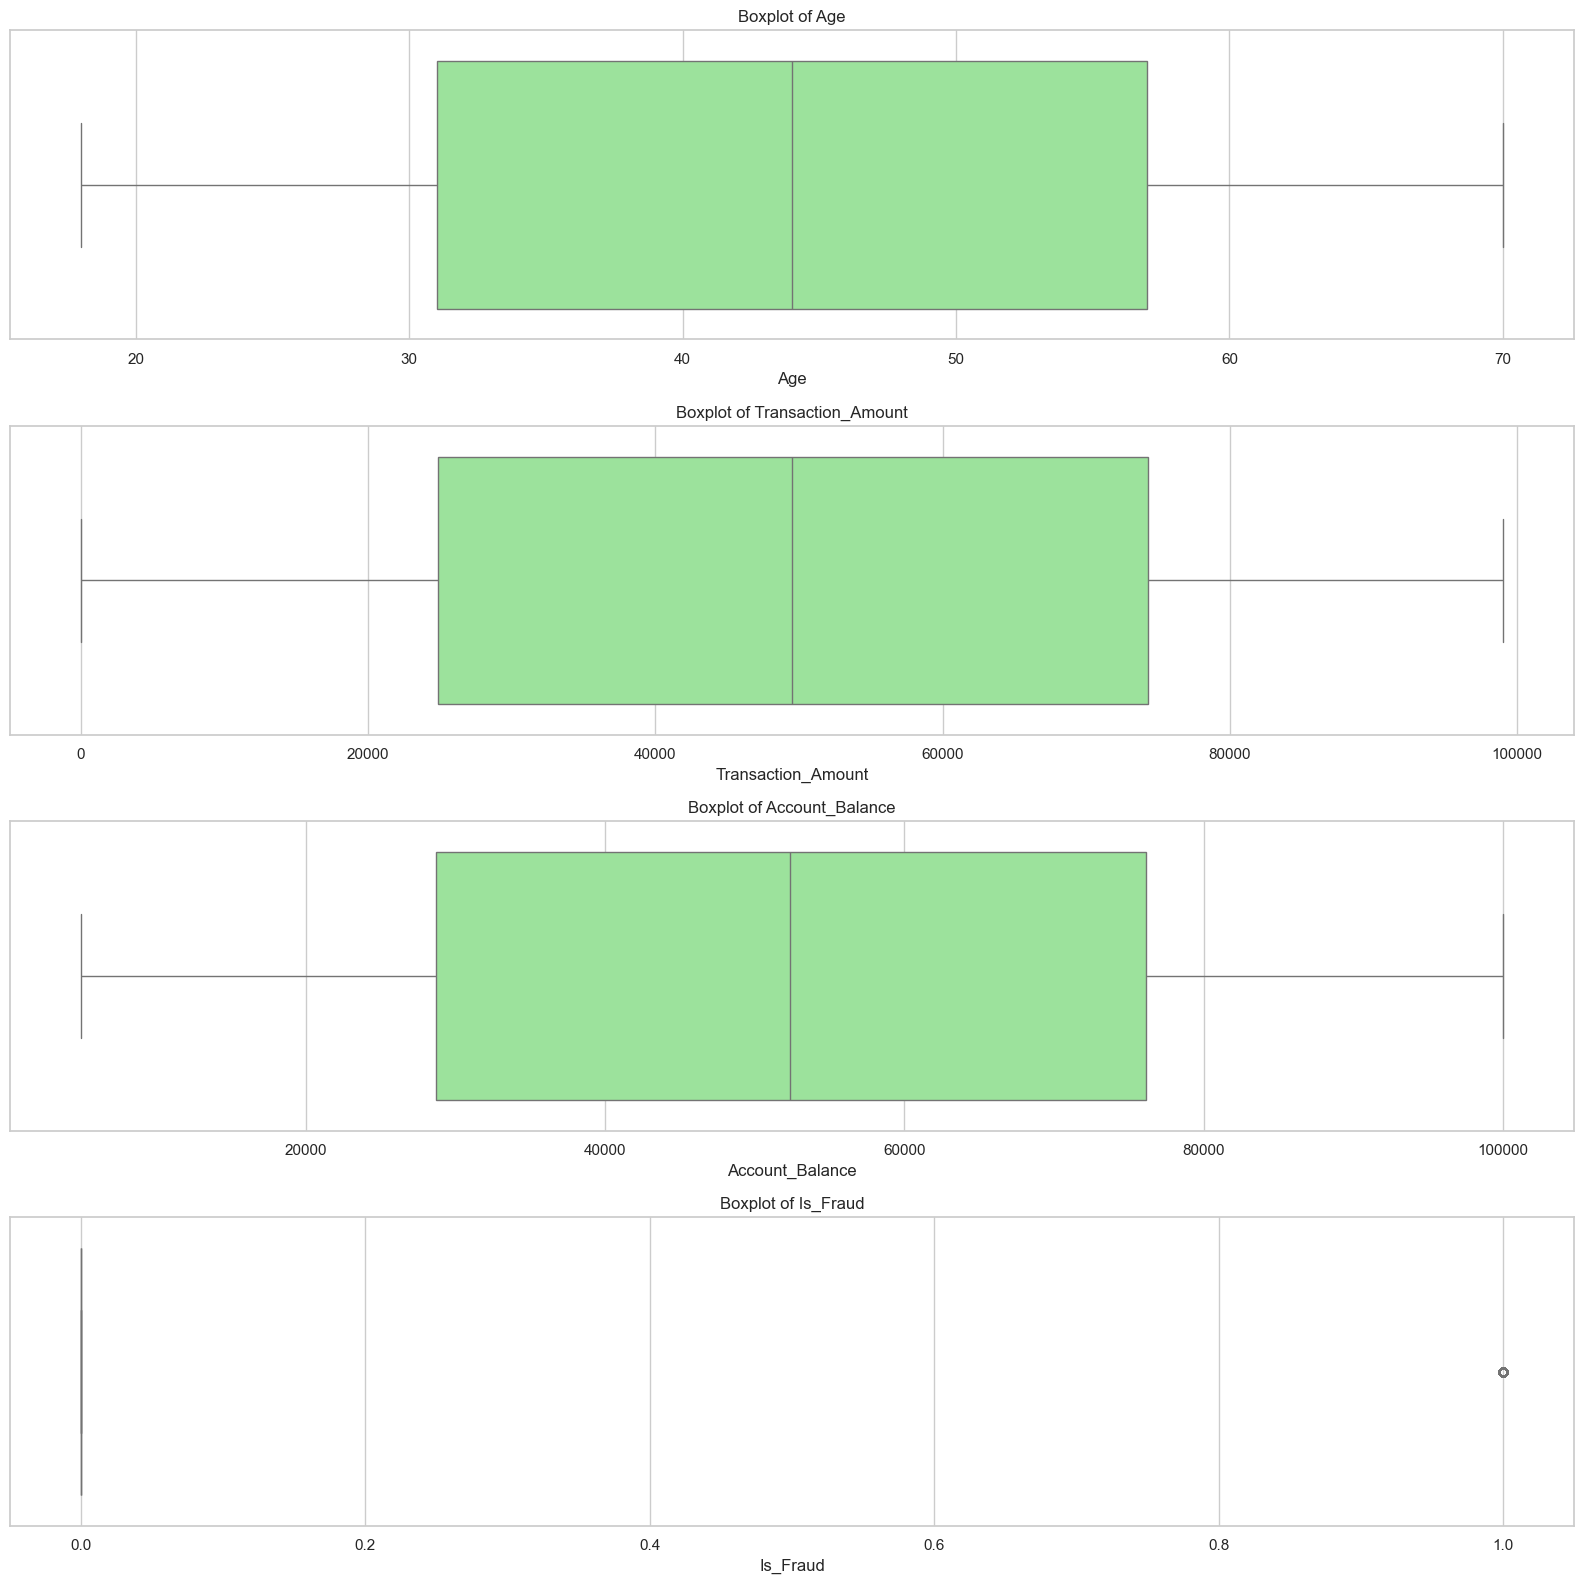

In [25]:
#checking for outliers
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(numeric_columns)))

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=df, x=column, color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


Value counts for column 'Gender':


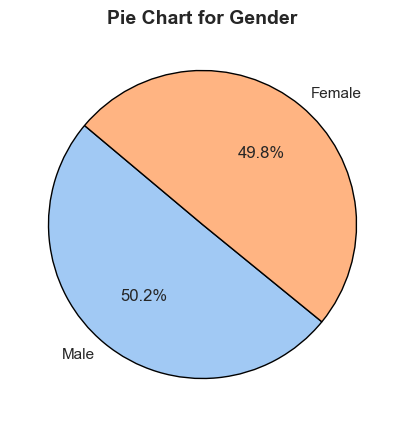

-------------------------
Value counts for column 'State':
State
Nagaland                                    6031
Meghalaya                                   6003
Uttar Pradesh                               6002
Uttarakhand                                 5985
Lakshadweep                                 5954
Telangana                                   5952
Haryana                                     5947
Delhi                                       5943
Kerala                                      5933
Madhya Pradesh                              5928
Arunachal Pradesh                           5919
Punjab                                      5912
Gujarat                                     5901
Odisha                                      5899
Jharkhand                                   5898
Mizoram                                     5892
Himachal Pradesh                            5875
Goa                                         5871
Tripura                                     5869
Mani

<Figure size 700x500 with 0 Axes>

-------------------------
Value counts for column 'City':
City
Chandigarh     8135
Kavaratti      5954
Udaipur        2681
Daman          2022
Car Nicobar    1956
               ... 
Nashik         1125
Guwahati       1122
Asansol        1118
Jaipur         1115
Silchar        1112
Name: count, Length: 145, dtype: int64


<Figure size 700x500 with 0 Axes>

-------------------------
Value counts for column 'Bank_Branch':
Bank_Branch
Chandigarh Branch     8135
Kavaratti Branch      5954
Udaipur Branch        2681
Daman Branch          2022
Car Nicobar Branch    1956
                      ... 
Nashik Branch         1125
Guwahati Branch       1122
Asansol Branch        1118
Jaipur Branch         1115
Silchar Branch        1112
Name: count, Length: 145, dtype: int64


<Figure size 700x500 with 0 Axes>

-------------------------
Value counts for column 'Account_Type':


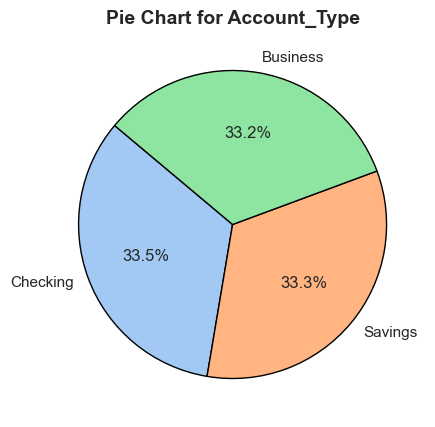

-------------------------
Value counts for column 'Transaction_Type':


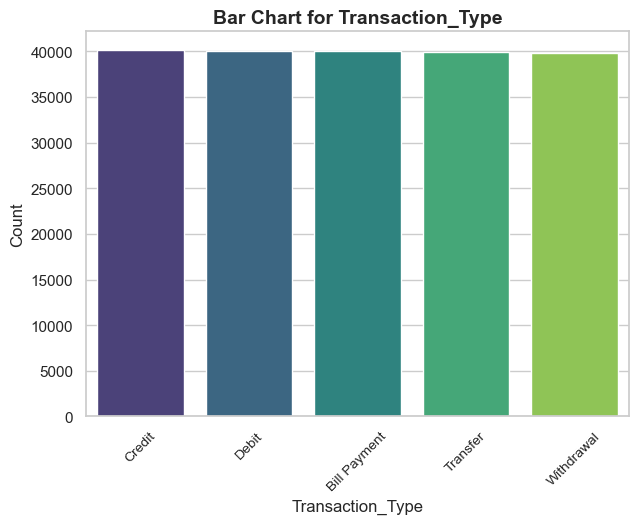

-------------------------
Value counts for column 'Merchant_Category':


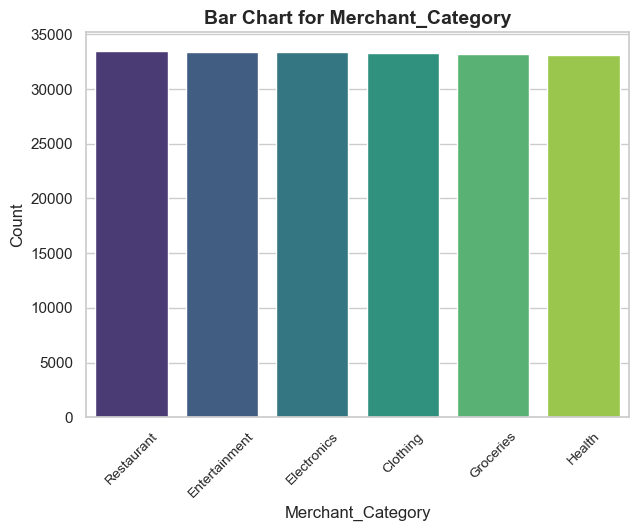

-------------------------
Value counts for column 'Transaction_Device':
Transaction_Device
Self-service Banking Machine    21707
ATM                             21200
ATM Booth Kiosk                 21149
Debit/Credit Card                8273
Smart Card                       8133
Wearable Device                  8128
Virtual Card                     8059
Tablet                           8059
Desktop/Laptop                   8057
Voice Assistant                  8039
POS Mobile Device                8006
Banking Chatbot                  7995
Web Browser                      7981
Biometric Scanner                7952
QR Code Scanner                  7938
Mobile Device                    7879
Payment Gateway Device           7874
POS Mobile App                   7868
Bank Branch                      7855
POS Terminal                     7848
Name: count, dtype: int64


<Figure size 700x500 with 0 Axes>

-------------------------
Value counts for column 'Transaction_Location':
Transaction_Location
Kavaratti, Lakshadweep                             5954
Chandigarh, Chandigarh                             5797
Daman, Dadra and Nagar Haveli and Daman and Diu    2022
Car Nicobar, Andaman and Nicobar Islands           1956
Port Blair, Andaman and Nicobar Islands            1950
                                                   ... 
Nashik, Maharashtra                                1125
Guwahati, Assam                                    1122
Asansol, West Bengal                               1118
Jaipur, Rajasthan                                  1115
Silchar, Assam                                     1112
Name: count, Length: 148, dtype: int64


<Figure size 700x500 with 0 Axes>

-------------------------
Value counts for column 'Device_Type':


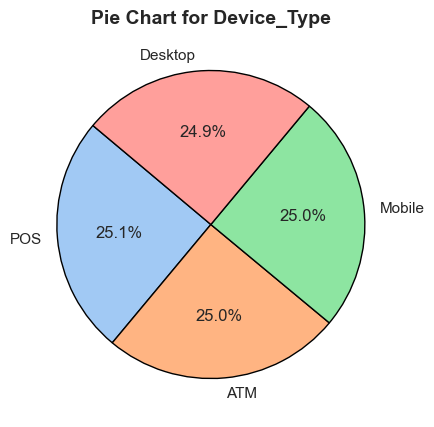

-------------------------


In [26]:
sns.set_theme(style="whitegrid") 

for i in Categorical:
    print(f"Value counts for column '{i}':")
    value_counts = df[i].value_counts()
    unique_count = len(value_counts)

    plt.figure(figsize=(7, 5))
    
    if 1 < unique_count < 5:
        colors = sns.color_palette("pastel")  
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, 
                startangle=140, wedgeprops={'edgecolor': 'black'})
        plt.title(f"Pie Chart for {i}", fontsize=14, fontweight="bold")

    elif 5 <= unique_count <= 15:
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis") 
        plt.title(f"Bar Chart for {i}", fontsize=14, fontweight="bold")
        plt.xlabel(i, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
    else : 
        print(value_counts)

    plt.show()
    print("-" * 25)

In [27]:
def kdePlotForNumericalData(x):
    plt.figure(figsize=(7, 5))
    sns.set_theme(style="whitegrid") 

    color = sns.color_palette("viridis", as_cmap=True)(0.6)  
    
    sns.kdeplot(df[x], fill=True, color=color, linewidth=2)

    plt.title(f"KDE Plot of {x} Distribution", fontsize=14, fontweight="bold")
    plt.xlabel(x, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    
    plt.show()


Age 
 count    200000.000000
mean         44.015110
std          15.288774
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64


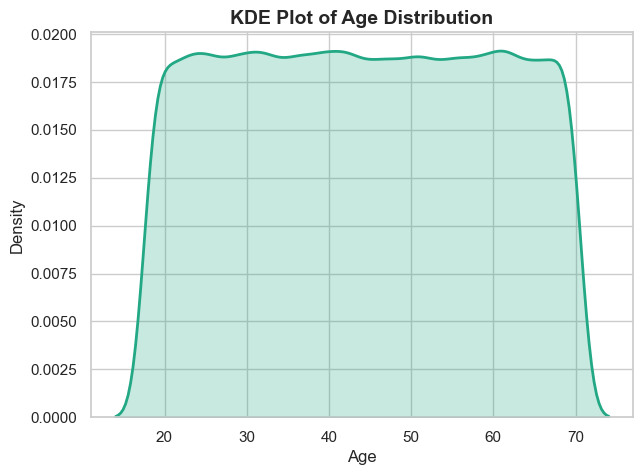

-------------------------
Transaction_Amount 
 count    200000.000000
mean      49538.015554
std       28551.874004
min          10.290000
25%       24851.345000
50%       49502.440000
75%       74314.625000
max       98999.980000
Name: Transaction_Amount, dtype: float64


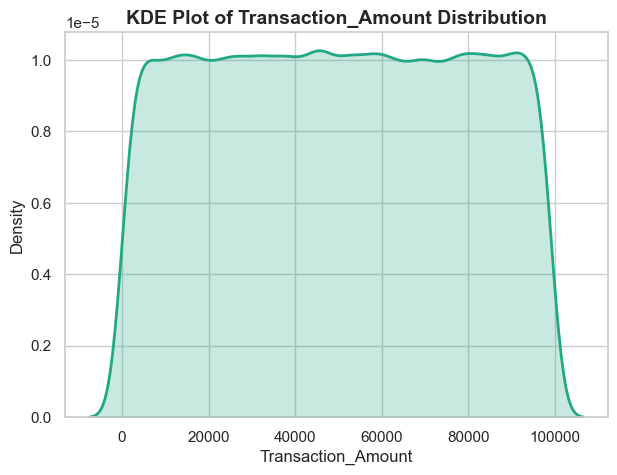

-------------------------
Account_Balance 
 count    200000.000000
mean      52437.988784
std       27399.507128
min        5000.820000
25%       28742.395000
50%       52372.555000
75%       76147.670000
max       99999.950000
Name: Account_Balance, dtype: float64


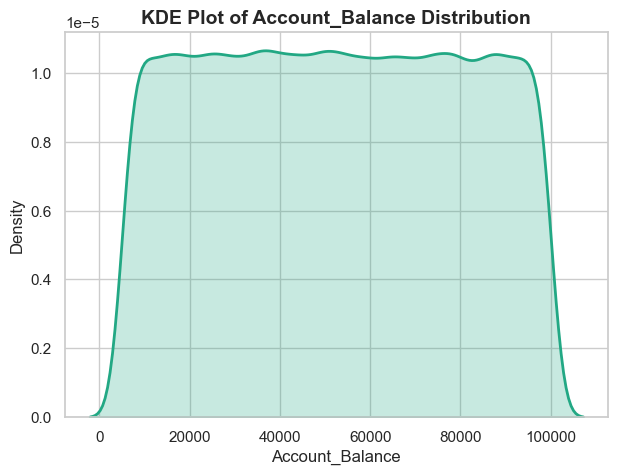

-------------------------
Is_Fraud 
 count    200000.000000
mean          0.050440
std           0.218852
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Is_Fraud, dtype: float64


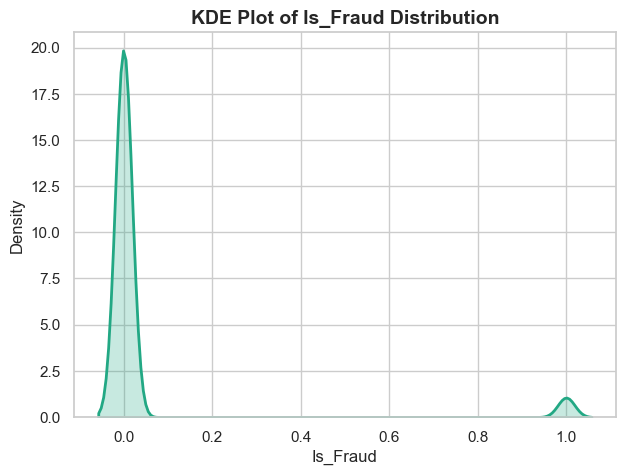

-------------------------
day 
 count    200000.000000
mean         15.515985
std           8.672289
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: day, dtype: float64


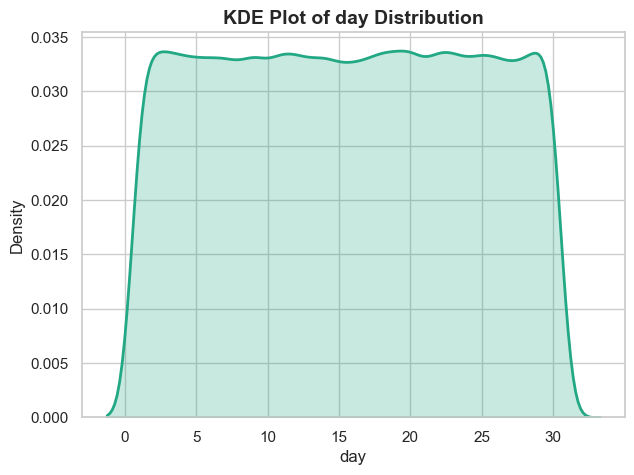

-------------------------
hour 
 count    200000.000000
mean         11.490420
std           6.917094
min           0.000000
25%           6.000000
50%          11.000000
75%          17.000000
max          23.000000
Name: hour, dtype: float64


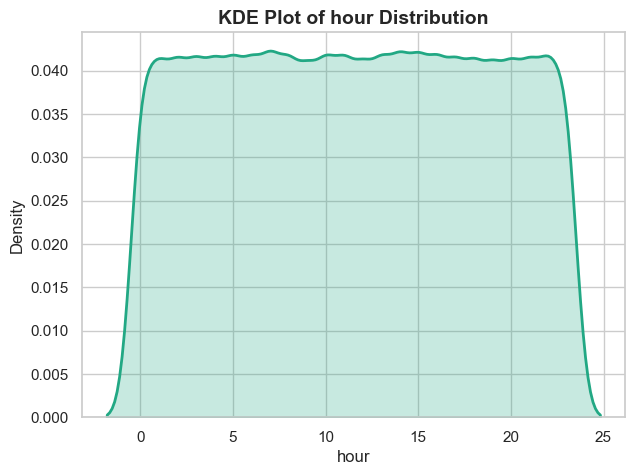

-------------------------
minute 
 count    200000.00000
mean         29.48192
std          17.28522
min           0.00000
25%          15.00000
50%          29.00000
75%          44.00000
max          59.00000
Name: minute, dtype: float64


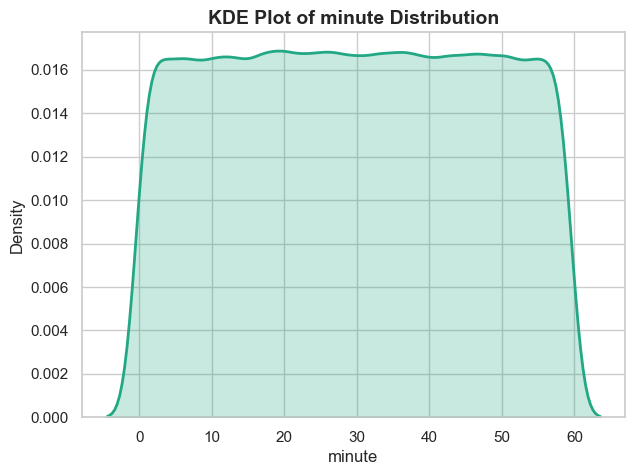

-------------------------
second 
 count    200000.00000
mean         29.50111
std          17.33988
min           0.00000
25%          14.00000
50%          29.00000
75%          45.00000
max          59.00000
Name: second, dtype: float64


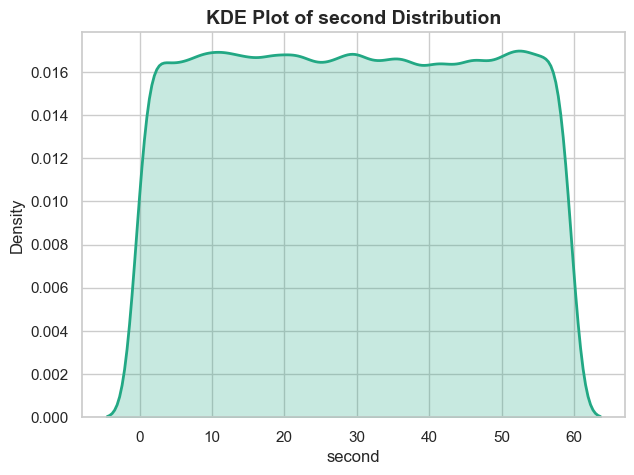

-------------------------


In [28]:
for i in Numerical:
    if i != 'year' and i != 'month':
        print(i, '\n', df[i].describe())
        kdePlotForNumericalData(i)
        print("-" * 25)

## Preprocessing 

### Encoding 

In [31]:
label_encoder = LabelEncoder()

In [32]:
for i in Categorical : 
    df[i] = label_encoder.fit_transform(df[i])

In [33]:
df

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,year,month,day,hour,minute,second
0,1,60,15,127,127,2,32415.45,3,5,74557.27,17,129,3,0,2025,1,23,16,4,7
1,0,51,18,100,100,0,43622.60,0,5,74622.66,9,102,1,0,2025,1,11,17,14,53
2,1,20,4,13,13,2,63062.56,0,3,66817.99,0,13,1,0,2025,1,25,3,9,52
3,0,57,28,22,22,0,14000.72,2,2,58177.08,8,24,2,0,2025,1,19,12,27,2
4,0,43,25,7,7,2,18335.16,3,2,16108.56,16,7,2,0,2025,1,30,18,30,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,55,7,33,33,0,98513.74,1,5,37475.11,6,35,0,0,2025,1,8,18,42,9
199996,1,51,19,63,63,0,40593.55,4,3,53037.20,0,65,0,0,2025,1,1,20,51,21
199997,0,41,5,21,21,2,61579.70,4,4,96225.36,0,21,1,0,2025,1,28,10,47,40
199998,0,28,29,103,103,1,39488.22,2,1,89599.90,17,105,1,0,2025,1,8,6,26,41


In [34]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                200000 non-null  int32  
 1   Age                   200000 non-null  int64  
 2   State                 200000 non-null  int32  
 3   City                  200000 non-null  int32  
 4   Bank_Branch           200000 non-null  int32  
 5   Account_Type          200000 non-null  int32  
 6   Transaction_Amount    200000 non-null  float64
 7   Transaction_Type      200000 non-null  int32  
 8   Merchant_Category     200000 non-null  int32  
 9   Account_Balance       200000 non-null  float64
 10  Transaction_Device    200000 non-null  int32  
 11  Transaction_Location  200000 non-null  int32  
 12  Device_Type           200000 non-null  int32  
 13  Is_Fraud              200000 non-null  int64  
 14  year                  200000 non-null  int32  
 15  

In [35]:
X = df.drop(columns=['Is_Fraud'])

In [36]:
Y = df['Is_Fraud']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X , Y , test_size=0.2 , random_state=42 )

### Scaling 

In [39]:
Scaling = StandardScaler() 

In [40]:
scaledData = Scaling.fit_transform(x_train) 

In [41]:
x_train_scaled = pd.DataFrame(scaledData,columns=x_train.columns)

In [42]:
x_train_scaled

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,year,month,day,hour,minute,second
0,-1.005088,-0.524942,-1.482329,1.750748,1.750748,-1.226545,-1.243502,-0.705631,0.878821,-0.571419,-0.092887,1.755799,-0.447120,0.0,0.0,0.171485,-1.083895,-0.202656,-1.469352
1,-1.005088,-0.655753,1.679690,-0.541664,-0.541664,-1.226545,1.659210,0.001503,0.293689,-0.055549,-0.420169,-0.528198,0.446026,0.0,0.0,0.402100,-0.939299,1.069960,-1.584697
2,-1.005088,-0.263320,1.271687,-0.087957,-0.087957,-0.000421,-0.525214,-0.705631,-1.461708,0.132145,-0.747451,-0.080817,-0.447120,0.0,0.0,0.978637,0.940444,0.317960,-0.661936
3,-1.005088,1.110193,-1.584329,1.392558,1.392558,1.225702,0.724717,0.708637,0.293689,1.055514,1.379883,1.379057,0.446026,0.0,0.0,-0.520360,-1.662277,-1.301733,-1.296334
4,0.994938,-1.309807,0.965686,-0.278992,-0.278992,1.225702,1.160714,0.708637,0.878821,-0.944140,-1.074734,-0.269188,-0.447120,0.0,0.0,0.748022,-0.939299,-0.376194,1.414276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-1.005088,1.633437,-1.584329,1.631351,1.631351,-0.000421,1.712250,0.001503,-0.291443,0.666064,-0.911092,1.638067,1.339173,0.0,0.0,-0.520360,0.072870,-0.954656,1.125913
159996,-1.005088,-1.048185,0.659684,1.129886,1.129886,-1.226545,-1.510608,0.001503,-0.291443,-0.247549,0.398037,1.120047,-1.340267,0.0,0.0,0.748022,1.229635,-0.838964,0.895223
159997,-1.005088,-1.113590,-0.360322,-0.589422,-0.589422,1.225702,-0.732904,0.001503,0.878821,0.750419,-0.420169,-0.575290,1.339173,0.0,0.0,1.439867,-0.360917,-0.029117,-0.777281
159998,-1.005088,0.979383,-1.380328,-0.231233,-0.231233,-1.226545,1.344078,-0.705631,-1.461708,1.573536,0.725319,-0.222095,1.339173,0.0,0.0,0.056177,-0.650108,-0.665425,-1.238662


In [43]:
y_train

153248    0
67802     0
148889    0
103093    0
104681    0
         ..
119879    0
103694    1
131932    0
146867    0
121958    0
Name: Is_Fraud, Length: 160000, dtype: int64

## Modeling 

### Logistic Regression

In [46]:
logisticRegressionModel = LogisticRegression(class_weight='balanced') 

In [47]:
logisticRegressionModel.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

In [48]:
y_pred = logisticRegressionModel.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
score = confusion_matrix(y_test,y_pred)

In [51]:
score

array([[37955,     0],
       [ 2045,     0]], dtype=int64)

In [52]:
report = classification_report(y_test,y_pred)

In [53]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



### Random Forest

In [55]:
model = RandomForestClassifier(random_state=42 , class_weight = 'balanced')

In [56]:
model.fit(x_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [57]:
y_pred_for_RFC = model.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred_for_RFC))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_for_RFC))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

ROC-AUC Score: 0.5


### AdaBoost 

In [60]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [61]:
adamodel = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)

In [62]:
adamodel.fit(x_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [63]:
y_pred_for_adamodel = adamodel.predict(x_test)

In [64]:
print("Classification Report:\n", classification_report(y_test, y_pred_for_adamodel))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_for_adamodel))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     37955
           1       0.05      1.00      0.10      2045

    accuracy                           0.05     40000
   macro avg       0.03      0.50      0.05     40000
weighted avg       0.00      0.05      0.00     40000

ROC-AUC Score: 0.5


## Sampling

In [66]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_scaled, y_train)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='coolwarm', alpha=0.7)
plt.title("PCA - Visualizing Resampled Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
# Apply PCA to the SMOTE-resampled and scaled training data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_resampled)

# Plot the explained variance ratio to choose optimal components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Plot only the first 2 components for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='coolwarm', alpha=0.7)
plt.title("PCA - Visualizing Resampled Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='isFraud', loc='best')
plt.grid(True)
plt.show()

plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_resampled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_resampled, palette='coolwarm', alpha=0.7)
plt.title("t-SNE - Visualizing Resampled Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title='isFraud')
plt.grid(True)
plt.show()


### Logistic Regression with Over Sampling

In [68]:
logisticRegressionModelSampled = LogisticRegression(random_state=42) 

In [69]:
logisticRegressionModelSampled.fit(X_resampled,y_resampled)

LogisticRegression(random_state=42)

In [70]:
LR_y_pred_sampled = logisticRegressionModel.predict(x_test)

In [71]:
score = confusion_matrix(y_test,LR_y_pred_sampled)

In [72]:
score

array([[37955,     0],
       [ 2045,     0]], dtype=int64)

In [73]:
report = classification_report(y_test,LR_y_pred_sampled)

In [74]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



### KNeighbours with over Sampling

In [76]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [82]:
y_pred_for_KNN = knn.predict(x_test)

In [97]:
print("🔎 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_for_KNN))
print("ROC AUC:", roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_for_KNN))
print(classification_report(y_test, y_pred_for_KNN))


🔎 K-Nearest Neighbors
Accuracy: 0.948875
ROC AUC: 0.4998618039184866
[[37955     0]
 [ 2045     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



### Random Forest With over sampling

In [98]:
RFmodelOverSampled = RandomForestClassifier(random_state=42)

In [99]:
RFmodelOverSampled.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [100]:
y_pred_for_RFC2 = RFmodelOverSampled.predict(x_test)

In [101]:
print(classification_report(y_test, y_pred_for_RFC2))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_for_RFC2))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     37955
           1       0.05      0.15      0.07      2045

    accuracy                           0.81     40000
   macro avg       0.50      0.50      0.48     40000
weighted avg       0.90      0.81      0.85     40000

ROC-AUC Score: 0.4974766154360507


### AdaBoost with Over Sampling

In [102]:
adamodel_sampled = AdaBoostClassifier(random_state=42)

In [103]:
adamodel_sampled.fit(X_resampled, y_resampled)

AdaBoostClassifier(random_state=42)

In [104]:
y_pred_for_ada_sampled = adamodel_sampled.predict(x_test)

In [124]:
print("Classification Report:\n", classification_report(y_test, y_pred_for_ada_sampled))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_for_ada_sampled))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     37955
           1       0.05      0.09      0.06      2045

    accuracy                           0.86     40000
   macro avg       0.50      0.50      0.49     40000
weighted avg       0.90      0.86      0.88     40000

ROC-AUC Score: 0.4958564366050519


In [130]:
# Comparing Model Predictions
results = [
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, LR_y_pred_sampled),
        "Precision": precision_score(y_test, LR_y_pred_sampled),
        "Recall": recall_score(y_test, LR_y_pred_sampled),
        "F1-Score": f1_score(y_test, LR_y_pred_sampled),
        "ROC AUC": roc_auc_score(y_test,LR_y_pred_sampled.predict_proba(X_test)[:, 1])
    },
    {
        "Model": "K-Nearest Neighbors",
        "Accuracy": accuracy_score(y_test, knn_pred),
        "Precision": precision_score(y_test, knn_pred),
        "Recall": recall_score(y_test, knn_pred),
        "F1-Score": f1_score(y_test, knn_pred),
        "ROC AUC": roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
    },
    {
        "Model": "AdaBoost",
        "Accuracy": accuracy_score(y_test, ada_pred),
        "Precision": precision_score(y_test, ada_pred),
        "Recall": recall_score(y_test, ada_pred),
        "F1-Score": f1_score(y_test, ada_pred),
        "ROC AUC": roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])
    }
]

# Create leaderboard DataFrame
leaderboard = pd.DataFrame(results)
leaderboard = leaderboard.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

# Display the leaderboard
print("Model Leaderboard:")
print(leaderboard)


NameError: name 'precision_score' is not defined